# EC602 Fall 2024

# Assignment Four

Posted:  October 8, 2024

Due:  October 29, 2024


Details
-------

Groups of 1, 2, or 3

Assignment value: one of ten required weekly assignments.


Assignment Description
----------------------

In this assignment, your goal is to develop educational visualizations / animations in Jupyter Notebook.


The group should pick one topic, preferably from a STEM topic (science, technology, engineering, mathematics) that you are very familiar with, and present a short lesson on this topic that includes interactive visualization tools with graphs / images.

There should be at least one control element (slider, widget, form) that changes the view.


## Possible Tools

- ipywidgets (widgets and display tools)
- matplotlib (plots and animations)
- plotly  (plots and animations)
- opencv2 (video and image manipulations)
- turtle (basic geometric and algorithm visualizations)

Other examples to show

- pythontutor

## Requirements and Deliverables


For each group member, you should deliver a separate (using a different tool chain) visualization on the SAME topic.

Compare the appropriateness of the tools selected for the tasks at hand.




In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from scipy.fft import fft, ifft, fftfreq
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
from scipy.signal import sawtooth,square

In [4]:
#The Fourier Transform
N=1000000
max=1000
T=max/N
x=np.linspace(0,max,N)
y=np.sin(.5*2*np.pi*x)+np.sin(.2*2*np.pi*x)+np.sin(.3*2*np.pi*x)+.5*np.sin(.1*2*np.pi*x)+.78*np.sin(.78*2*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

The Fourier Transform is simply the process by which we transform a wave from its representation in the time domain to its representation in the frequency domain.  If that sounds confusing, consider the video below for a simple example.  The graph of the left shows the wave in the time domain, and the graph on the left shows the wave in the frequency domain.  As we increase the frequency of the wave, the delta function on the right moves.  If you look at the location of the delta function on the x axis, you'll see that it correponds to the frequncy of the wave in the time domain.  Even though Fourier Transforms can sound scary, that's really all there is to it.  This is the most simple example, but the more complicated examples ahead will reveal the power of the Fourier transform.  

Note:  Please disregard the frozen plot below the video.  When I try to make it disappear, the video doesn't render.

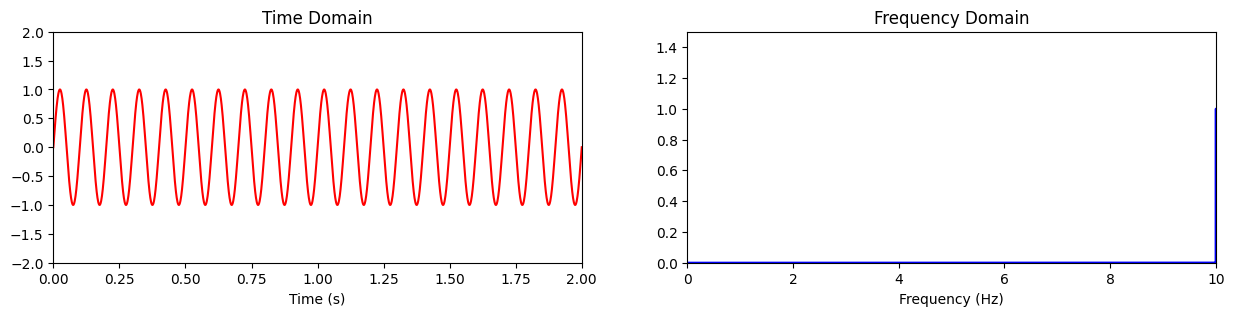

In [ ]:
#Create plots
fig = plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
time_d, = ax1.plot([], [], 'r')
frequency_d, = ax2.plot([], [], 'b')

#Scaling and Naming of Axes
ax1.set_xlim(( 0, 2))
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time (s)')
ax1.set_title('Time Domain')
ax2.set_xlim((0,10))
ax2.set_ylim((0,1.5))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_title('Frequency Domain')

#Frequencies to sweep over
frequency = np.linspace(.1, 10, 100)

#Each frame of the video is created in this function
def frame(n):

  #Perform Fourier Transform
  x=np.linspace(0,max,N)
  y=np.sin(frequency[n]*2*np.pi*x)
  yf = fft(y)
  xf = fftfreq(N, T)[:N//2]

  #Update frame
  time_d.set_data(x,y)
  frequency_d.set_data(xf,2.0/N * np.abs(yf[0:N//2]))
  return(time_d, frequency_d)

#Create animation and video
HTML(animation.FuncAnimation(fig=fig, func=frame, frames=100, interval=30, blit=True).to_html5_video())

Let's move on to something more complicated.  The below tool will allow you to enter your own amplitudes and frequencies for multiple sine waves, and then it will show you the resultant combined wave.  Depending on your input, it may look complex in the time domain, but you'll see that its representation in the frequency domain may still be simple.  Hopefully you'll see that a complex time domain wave can be just a few delta functions in the frequency domain.

Note: Because this code is run on google servers, it will be necessary to copy and paste this code and run it on your local machine in order to get the GUI to load.  The code is commented out so as not to cause errors in the Google Colab Environment, so uncomment the entire block before running.

In [ ]:
# from tkinter import *
# from tkinter import ttk
# from tkinter import *
# from matplotlib.figure import Figure
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.fft import fft, ifft, fftfreq

# #Create window
# root = Tk()
# root.minsize(1000,1000)
# frm = ttk.Frame(root, padding=10)
# frm.grid()

# #Plot function, called by plot button
# def plot():

#     #Params
#     N=1000000
#     max=1000
#     T=max/N

#     #Create time plot
#     fig_time = Figure(figsize = (8, 2))
#     plot_time = fig_time.add_subplot()
#     x=np.linspace(0,max,N)
#     y_1=float(wave1_a.get('1.0', 'end'))*np.sin(float(wave1_f.get('1.0','end'))*np.pi*2*x)
#     y_2=float(wave2_a.get('1.0', 'end'))*np.sin(float(wave2_f.get('1.0','end'))*np.pi*2*x)
#     y_3=float(wave3_a.get('1.0', 'end'))*np.sin(float(wave3_f.get('1.0','end'))*np.pi*2*x)
#     y_4=float(wave4_a.get('1.0', 'end'))*np.sin(float(wave4_f.get('1.0','end'))*np.pi*2*x)
#     y_5=float(wave5_a.get('1.0', 'end'))*np.sin(float(wave5_f.get('1.0','end'))*np.pi*2*x)
#     y=y_1+y_2+y_3+y_4+y_5
#     plot_time.plot(x,y)
#     plot_time.set_xlim(0,10)

#     #Add plot to window
#     canvas = FigureCanvasTkAgg(fig_time, master = root)
#     canvas.draw()
#     canvas.get_tk_widget().grid(column=0, row=7)

#     #Fourier Transform
#     yf = fft(y)
#     xf = fftfreq(N, T)[:N//2]

#     #Create plot
#     fig = Figure(figsize = (8, 2))
#     plot = fig.add_subplot()
#     plot.plot(xf,2.0/N * np.abs(yf[0:N//2]))
#     plot.set_xlim(0,20)

#     #Add plot to window
#     canvas = FigureCanvasTkAgg(fig, master = root)
#     canvas.draw()
#     canvas.get_tk_widget().grid(column=0, row=8)



# #Quit Button
# ttk.Button(frm, text="Quit", command=root.destroy).grid(column=1, row=0)

# #Plot Button
# ttk.Button(frm, text="Plot", command=plot).grid(column=0, row=0)
# ttk.Label(text="",font=('Helvetica', 18, 'bold')).grid(column=0, row=1)

# #Wave 1 User Entries
# row=2
# ttk.Label(text=" Wave 1:", font=('Helvetica', 18, 'bold')).grid(column=0, row=row)
# ttk.Label(text=" Amplitude: ").grid(column=1, row=row)
# wave1_a=Text(root, height = 1, width = 10, wrap=None)
# wave1_a.grid(column=2, row=row)
# wave1_a.insert(END, "0")
# ttk.Label(text=" Frequency: ").grid(column=3, row=row)
# wave1_f=Text(root, height = 1, width = 10, wrap=None)
# wave1_f.grid(column=4, row=row)
# wave1_f.insert(END, "1")


# #Wave 2 User Entries
# row=3
# ttk.Label(text=" Wave 2:", font=('Helvetica', 18, 'bold')).grid(column=0, row=row)
# ttk.Label(text=" Amplitude: ").grid(column=1, row=row)
# wave2_a=Text(root, height = 1, width = 10, wrap=None)
# wave2_a.grid(column=2, row=row)
# wave2_a.insert(END, "0")
# ttk.Label(text=" Frequency: ").grid(column=3, row=row)
# wave2_f=Text(root, height = 1, width = 10, wrap=None)
# wave2_f.grid(column=4, row=row)
# wave2_f.insert(END, "1")


# #Wave 3 User Entries
# row=4
# ttk.Label(text=" Wave 3:", font=('Helvetica', 18, 'bold')).grid(column=0, row=row)
# ttk.Label(text=" Amplitude: ").grid(column=1, row=row)
# wave3_a=Text(root, height = 1, width = 10, wrap=None)
# wave3_a.grid(column=2, row=row)
# wave3_a.insert(END, "0")
# ttk.Label(text=" Frequency: ").grid(column=3, row=row)
# wave3_f=Text(root, height = 1, width = 10, wrap=None)
# wave3_f.grid(column=4, row=row)
# wave3_f.insert(END, "1")


# #Wave 4 User Entries
# row=5
# ttk.Label(text=" Wave 4:", font=('Helvetica', 18, 'bold')).grid(column=0, row=row)
# ttk.Label(text=" Amplitude: ").grid(column=1, row=row)
# wave4_a=Text(root, height = 1, width = 10, wrap=None)
# wave4_a.grid(column=2, row=row)
# wave4_a.insert(END, "0")
# ttk.Label(text=" Frequency: ").grid(column=3, row=row)
# wave4_f=Text(root, height = 1, width = 10, wrap=None)
# wave4_f.grid(column=4, row=row)
# wave4_f.insert(END, "1")


# #Wave 5 User Entries
# row=6
# ttk.Label(text=" Wave 5:", font=('Helvetica', 18, 'bold')).grid(column=0, row=row)
# ttk.Label(text=" Amplitude: ").grid(column=1, row=row)
# wave5_a=Text(root, height = 1, width = 10, wrap=None)
# wave5_a.grid(column=2, row=row)
# wave5_a.insert(END, "0")
# ttk.Label(text=" Frequency: ").grid(column=3, row=row)
# wave5_f=Text(root, height = 1, width = 10, wrap=None)
# wave5_f.grid(column=4, row=row)
# wave5_f.insert(END, "1")


# plot()


# root.mainloop()

We've looked at the Fourier Transforms of sinusoidal functions, so let's take a look at some Fourier Transforms for some non-trivial functions.  Using the Fourier transform, you'll see that even these non-smooth functions are simply combinations of sinusoidal waves.

Sawtooth Wave:

(0.0, 5.0)

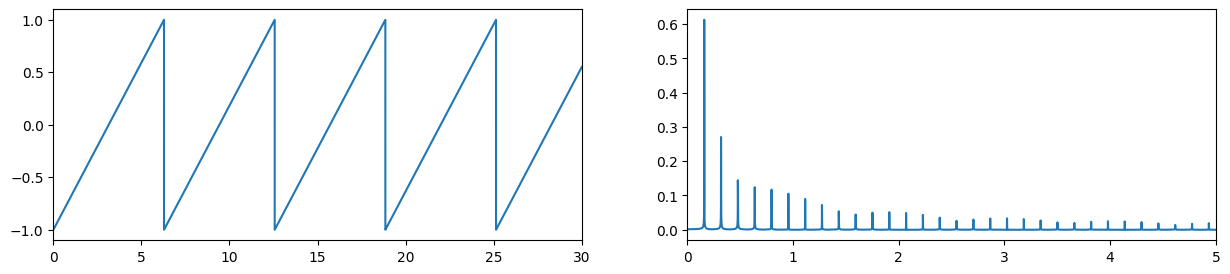

In [ ]:
#Init figure
fig = plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

#Fourier Transform
y=sawtooth(x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

#Plot
ax1.plot(x,y)
ax1.set_xlim(0,30)
ax2.plot(xf,2.0/N * np.abs(yf[0:N//2]))
ax2.set_xlim(0,5)

Triangle Wave:

(0.0, 5.0)

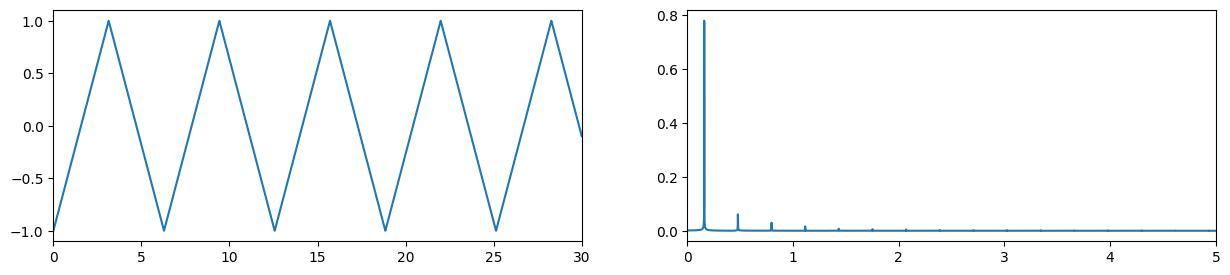

In [ ]:
#Init figure
fig = plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

#Fourier Transform
y=sawtooth(x,.5)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

#Plot
ax1.plot(x,y)
ax1.set_xlim(0,30)
ax2.plot(xf,2.0/N * np.abs(yf[0:N//2]))
ax2.set_xlim(0,5)

Square Wave:

(0.0, 5.0)

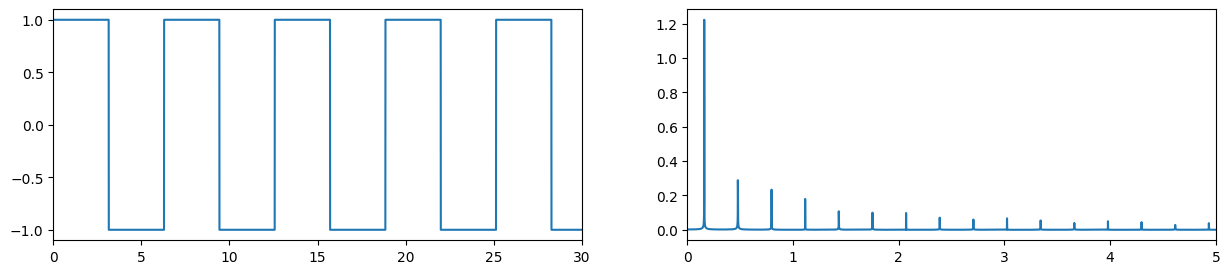

In [ ]:
#Init figure
fig = plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

#Fourier Transform
y=square(x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

#Plot
ax1.plot(x,y)
ax1.set_xlim(0,30)
ax2.plot(xf,2.0/N * np.abs(yf[0:N//2]))
ax2.set_xlim(0,5)